In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

[ 5.68845650e+09  6.10297694e-02 -1.32496724e+02  4.13305862e-05]


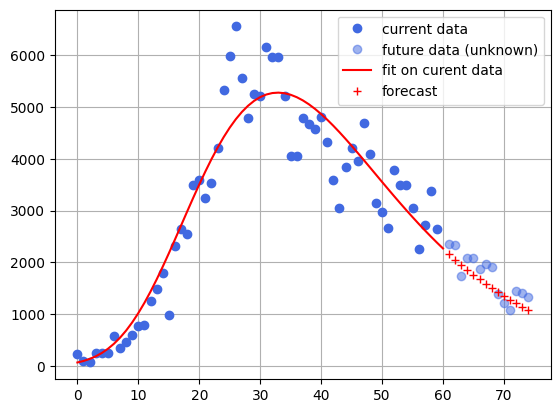

In [23]:
# Define the Richardson bell curve function
def richardson(t, K, r, tm, nu):
    return r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm))))

# Generate some sample data
# Import data
T=100
national_data=pd.read_csv('..\data\dati-andamento-nazionale\dpc-covid19-ita-andamento-nazionale.csv')
new_pos=national_data['nuovi_positivi'].values[0:T]
t= np.arange(0,T)

# Fit the data to the Richardson bell curve
popt, pcov = curve_fit(richardson, t, new_pos, p0=[3500000,0.1,1,0.05], maxfev=10000)

# Print the best-fit parameters
print(popt)

# Plot the original data and the best-fit curve
yfit = richardson(t, *popt)
plt.plot(t[0:60], new_pos[0:60], 'royalblue', marker='o', linestyle='None', label='current data')
plt.plot(t[61:75], new_pos[61:75], 'royalblue', alpha=0.5 , marker='o', linestyle='None', label='future data (unknown)')
plt.plot(t[0:61], yfit[0:61], 'r-', label='fit on curent data')
plt.plot(t[61:75], yfit[61:75], color='r', marker='+', linestyle='None', label='forecast')
plt.legend()
plt.grid(True)
plt.show()


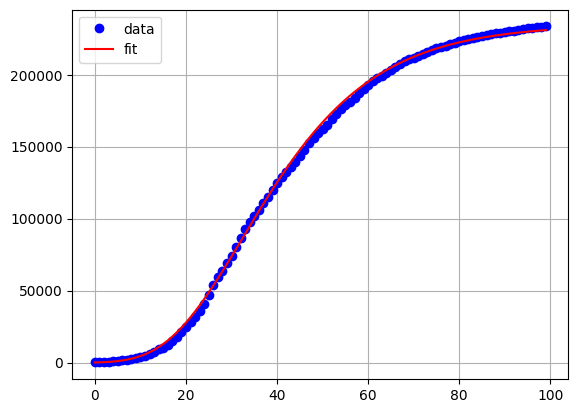

230998.0875435116
233507


In [12]:
cum_pos=np.cumsum(new_pos)
Yfit=np.cumsum(yfit)
plt.plot(t, cum_pos, 'bo', label='data')
plt.plot(t, Yfit, 'r-', label='fit')
plt.legend()
plt.grid(True)
plt.show()

print(Yfit[-1])
print(cum_pos[-1])

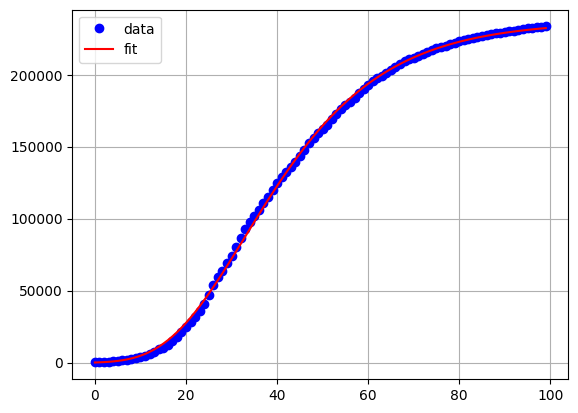

[ 8.08912044e+09  5.90756160e-02 -1.43235545e+02  2.93323101e-05]
232391.64716459127
233507


In [30]:
d0=0
cum_pos=np.cumsum(new_pos)

# Fit on the S curve
def cum_richardson(t, K, r, tm, nu):
    return np.cumsum(richardson(t, K, r, tm, nu))+d0

T=100
t= np.arange(0,T)

# Fit the data to the Richardson bell curve
popt, pcov = curve_fit(cum_richardson, t, cum_pos, p0=[ 5.68845650e+09,  6.10297694e-02, -1.32496724e+02,  4.13305862e-05], maxfev=100000)

# Plot the original data and the best-fit curve
Yfit = cum_richardson(t, *popt)
#Yfit = cum_richardson(t, 5.68845650e+09,  6.10297694e-02, -1.32496724e+02,  4.13305862e-05)
plt.plot(t, cum_pos, 'bo', label='data')
plt.plot(t, Yfit, 'r-', label='fit')
plt.legend()
plt.grid(True)
plt.show()

print(popt)

print(Yfit[-1])
print(cum_pos[-1])
